## Maven Music Challenge

### Spotify Streaming History
Spotify user's complete music streaming history data, including timestamps, track, artist, and album names, and reasons for playing and ending each track.

### Challenge Objective
Every December, millions of Spotify users look forward to their Spotify Wrapped – a personalized recap showcasing their listening habits over the past year.

Wrapped has become a social and cultural phenomenon, including breakdowns of listeners' most-streamed artists and tracks, total minutes listened, personalized playlists, and even video messages from artists to their top fans.

For the Maven Music Challenge, your task is to create your own version of Spotify Wrapped, by downloading your streaming history or using the sample dataset provided (if you aren't a Spotify user).

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Set Seaborn style for better visuals
sns.set(style="whitegrid", palette="muted", font_scale=1.0)

In [2]:
# read the dataset
data = pd.read_csv("Spotify_Streaming_History/spotify_history.csv")
data.shape

(149860, 11)

In [3]:
# let's look at few records
data.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,7/8/2013 2:44,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,7/8/2013 2:45,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,7/8/2013 2:50,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,7/8/2013 2:52,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,7/8/2013 3:17,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


#### Data Dictionary

 - spotify_track_uri: Spotify URI that uniquely identifies each track in the form of "spotify:track:<base-62 string>"
 - ts: Timestamp indicating when the track stopped playing in UTC (Coordinated Universal Time)
 - platform: Platform used when streaming the track
 - ms_played: Number of milliseconds the stream was played
 - track_name: Name of the track
 - artist_name: Name of the artist
 - album_name: Name of the album
 - reason_start: Why the track started
 - reason_end: Why the track ended
 - shuffle: TRUE or FALSE depending on if shuffle mode was used when playing the track
 - skipped: TRUE of FALSE depending on if the user skipped to the next song


In [4]:
# check the datatypes
data.dtypes

spotify_track_uri    object
ts                   object
platform             object
ms_played             int64
track_name           object
artist_name          object
album_name           object
reason_start         object
reason_end           object
shuffle                bool
skipped                bool
dtype: object

In [5]:
# descriptive statistics
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
spotify_track_uri,149860,16527,1BLOVHYYlH4JUHQGcpt75R,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ts,149860,95738,7/27/2017 20:11,209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platform,149860,6,android,139821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ms_played,149860.0,NaN,NaN,NaN,128316.635093,117840.060332,0.0,2795.0,138840.0,218507.0,1561125.0
track_name,149860,13839,Ode To The Mets,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_name,149860,4113,The Beatles,13621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
album_name,149860,7946,The Beatles,2063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reason_start,149717,13,trackdone,76655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reason_end,149743,15,trackdone,77194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shuffle,149860,2,True,111583,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# convert column "ts" into a datetime format
data['ts'] = pd.to_datetime(data['ts'])

In [7]:
data.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:00,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:00,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:00,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:00,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:00,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [8]:
# concise summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   spotify_track_uri  149860 non-null  object        
 1   ts                 149860 non-null  datetime64[ns]
 2   platform           149860 non-null  object        
 3   ms_played          149860 non-null  int64         
 4   track_name         149860 non-null  object        
 5   artist_name        149860 non-null  object        
 6   album_name         149860 non-null  object        
 7   reason_start       149717 non-null  object        
 8   reason_end         149743 non-null  object        
 9   shuffle            149860 non-null  bool          
 10  skipped            149860 non-null  bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(7)
memory usage: 10.6+ MB


In [9]:
# check for duplicate records
data.duplicated().sum()

1782

In [10]:
data = data.drop_duplicates()

In [11]:
# check for duplicate records
data.duplicated().sum()

0

In [12]:
# check for null/missing values
data.isnull().sum()

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64

In [13]:
# fill the missing values with reason "unknown"
data['reason_start'] = data['reason_start'].fillna("unknown")
data['reason_end'] = data['reason_end'].fillna("unknown")

In [14]:
# check for null/missing values
data.isnull().sum()

spotify_track_uri    0
ts                   0
platform             0
ms_played            0
track_name           0
artist_name          0
album_name           0
reason_start         0
reason_end           0
shuffle              0
skipped              0
dtype: int64

In [15]:
# Extracting date and time components
data['year'] = data['ts'].dt.year
data['month'] = data['ts'].dt.month_name()
data['day'] = data['ts'].dt.day
data['day_of_week'] = data['ts'].dt.day_name()
data['hour'] = data['ts'].dt.hour

In [16]:
# Categorize periods of the day
def get_day_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

data['day_period'] = data['hour'].apply(get_day_period)

In [17]:
# Play duration category
data['play_duration_category'] = pd.cut(
    data['ms_played'], 
    bins=[-1, 2795, 138840, 218507, 1561125], 
    labels=['Very Short', 'Short', 'Medium', 'Full'],
    right=True)

In [18]:
data.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,year,month,day,day_of_week,hour,day_period,play_duration_category
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:00,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,2013,July,8,Monday,2,Night,Short
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:00,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,2013,July,8,Monday,2,Night,Short
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:00,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,2013,July,8,Monday,2,Night,Full
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:00,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2013,July,8,Monday,2,Night,Short
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:00,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False,2013,July,8,Monday,3,Night,Very Short


In [19]:
# Top artists and tracks
top_artists = data.groupby('artist_name')['ms_played'].sum().sort_values(ascending=False).head(10)
top_artists

artist_name
The Beatles           1195821152
The Killers           1029586261
John Mayer             707529543
Bob Dylan              560367715
Paul McCartney         353736404
Howard Shore           348198589
The Strokes            309018931
The Rolling Stones     301682714
Pink Floyd             255820368
Led Zeppelin           245295507
Name: ms_played, dtype: int64

In [20]:
# Top artists and tracks
top_tracks = data.groupby('track_name')['ms_played'].sum().sort_values(ascending=False).head(10)
top_tracks

track_name
Ode To The Mets                                                                        66024432
The Return of the King (feat. Sir James Galway, Viggo Mortensen and Renee Fleming)     64401661
The Fellowship Reunited (feat. Sir James Galway, Viggo Mortensen and Renée Fleming)    44756730
19 Dias y 500 Noches - En Directo                                                      42375027
In the Blood                                                                           38183421
Claudia's Theme - Version Eight                                                        37120900
Dying Breed                                                                            35936660
The Breaking of the Fellowship (feat. "In Dreams")                                     35550098
The Road Goes Ever On..., Pt. 1                                                        35236377
All These Things That I've Done                                                        33643898
Name: ms_played, dtype: int64

In [21]:
# Listening trends
monthly_trends = data.groupby(['year', 'month'])['ms_played'].sum().reset_index()
monthly_trends

,year,month,ms_played
0,2013,August,8337447
1,2013,July,13709747
2,2013,September,6141279
3,2014,January,3741827
4,2015,August,76599500
...,...,...,...
113,2024,March,150092206
114,2024,May,90960090
115,2024,November,193944795
116,2024,October,218544444


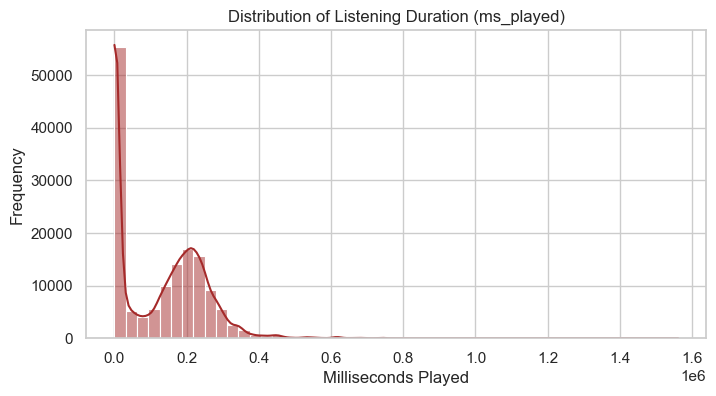

In [22]:
# Distribution of Listening Durations
plt.figure(figsize=(8,4))
sns.histplot(data['ms_played'], bins=50, kde=True, color='brown')
plt.title('Distribution of Listening Duration (ms_played)')
plt.xlabel('Milliseconds Played')
plt.ylabel('Frequency')
plt.show()

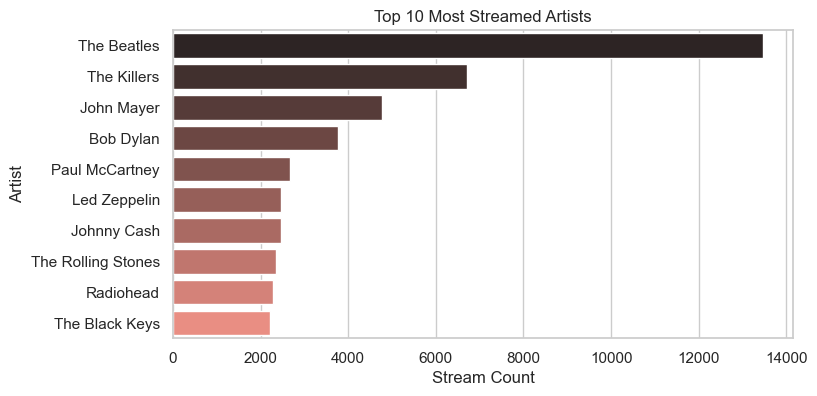

In [23]:
# Top Artists
top_artists = data['artist_name'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(y=top_artists.index, x=top_artists.values, palette='dark:salmon')
plt.title('Top 10 Most Streamed Artists')
plt.xlabel('Stream Count')
plt.ylabel('Artist')
plt.show()

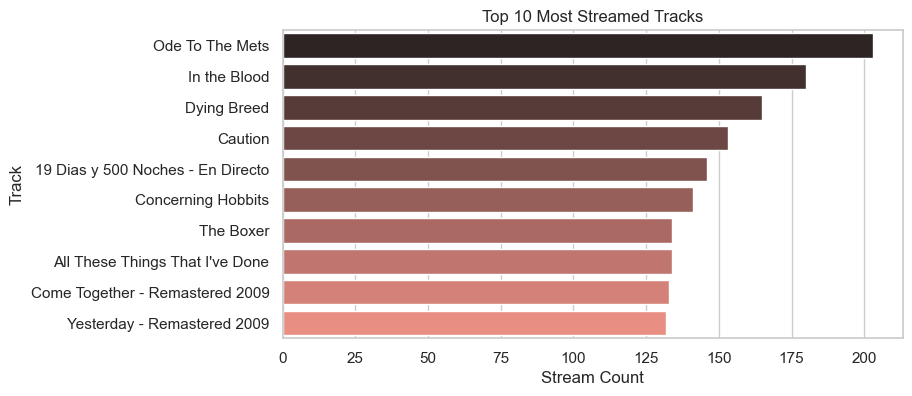

In [24]:
# Top Tracks
top_tracks = data['track_name'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(y=top_tracks.index, x=top_tracks.values, palette='dark:salmon')
plt.title('Top 10 Most Streamed Tracks')
plt.xlabel('Stream Count')
plt.ylabel('Track')
plt.show()

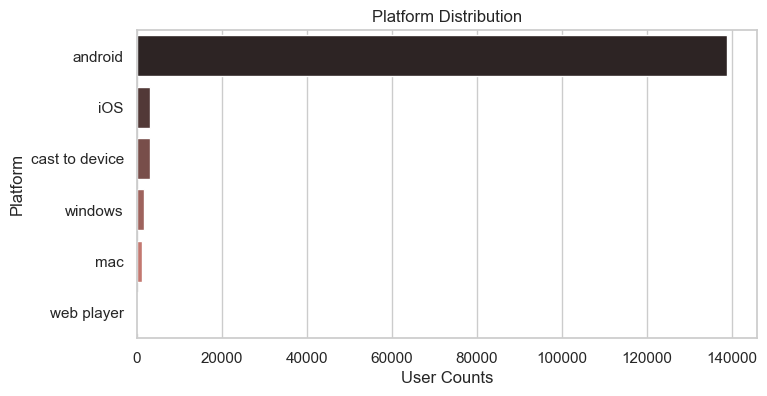

In [25]:
# Platform Usage
platform_counts = data['platform'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(y=platform_counts.index, x=platform_counts.values, palette='dark:salmon')
plt.title('Platform Distribution')
plt.xlabel('User Counts')
plt.ylabel('Platform')
plt.show()

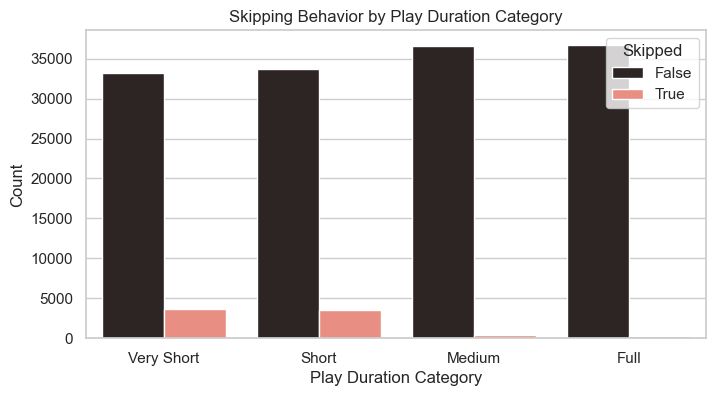

In [26]:
# Skipping Behavior by Play Duration Category
plt.figure(figsize=(8,4))
sns.countplot(data=data, x='play_duration_category', hue='skipped', palette='dark:salmon')
plt.title('Skipping Behavior by Play Duration Category')
plt.xlabel('Play Duration Category')
plt.ylabel('Count')
plt.legend(title='Skipped')
plt.show()

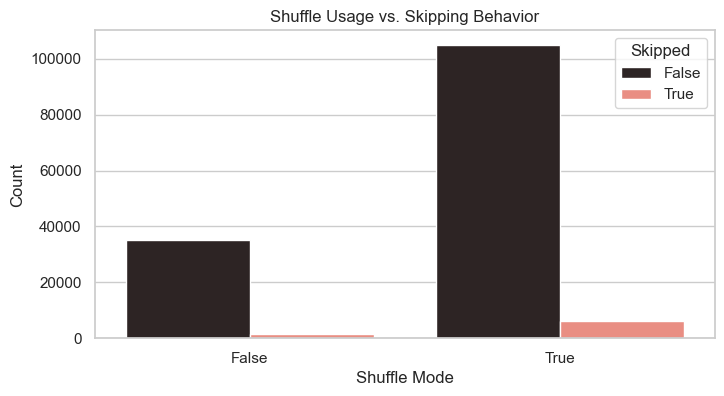

In [27]:
# Shuffle Usage by Skipping Behavior
plt.figure(figsize=(8,4))
sns.countplot(data=data, x='shuffle', hue='skipped', palette='dark:salmon')
plt.title('Shuffle Usage vs. Skipping Behavior')
plt.xlabel('Shuffle Mode')
plt.ylabel('Count')
plt.legend(title='Skipped')
plt.show()

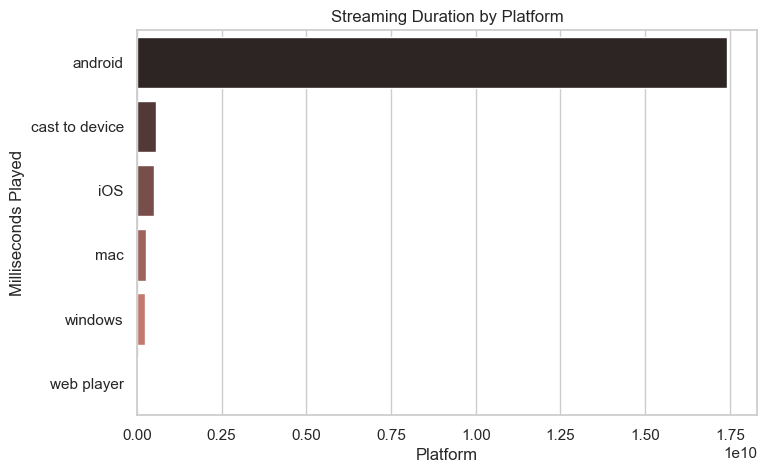

In [28]:
# Streaming Duration by Platform
str_dur_plat = data.groupby(['platform'])['ms_played'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=str_dur_plat.values, y=str_dur_plat.index, palette='dark:salmon')
plt.title('Streaming Duration by Platform')
plt.xlabel('Platform')
plt.ylabel('Milliseconds Played')
plt.show()

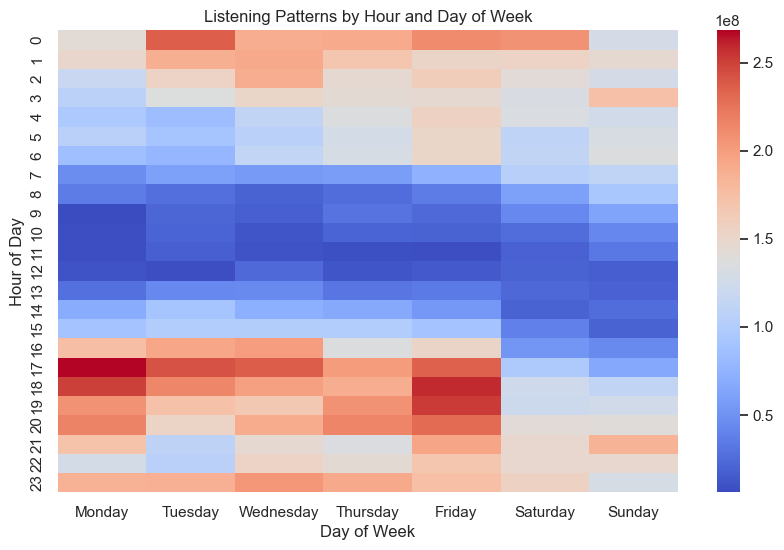

In [29]:
# Heatmap of Listening Patterns by Hour and Day
# Extract hour and day from timestamp
data['hour'] = data['ts'].dt.hour
data['day_of_week'] = data['ts'].dt.day_name()

# Define the correct order for days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert day_of_week to a categorical type with the specified order
data['day_of_week'] = pd.Categorical(data['day_of_week'], categories=days_order, ordered=True)

listening_heatmap = data.groupby(['hour', 'day_of_week'])['ms_played'].sum().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(listening_heatmap, cmap='coolwarm', annot=False, fmt='.0f')
plt.title('Listening Patterns by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()

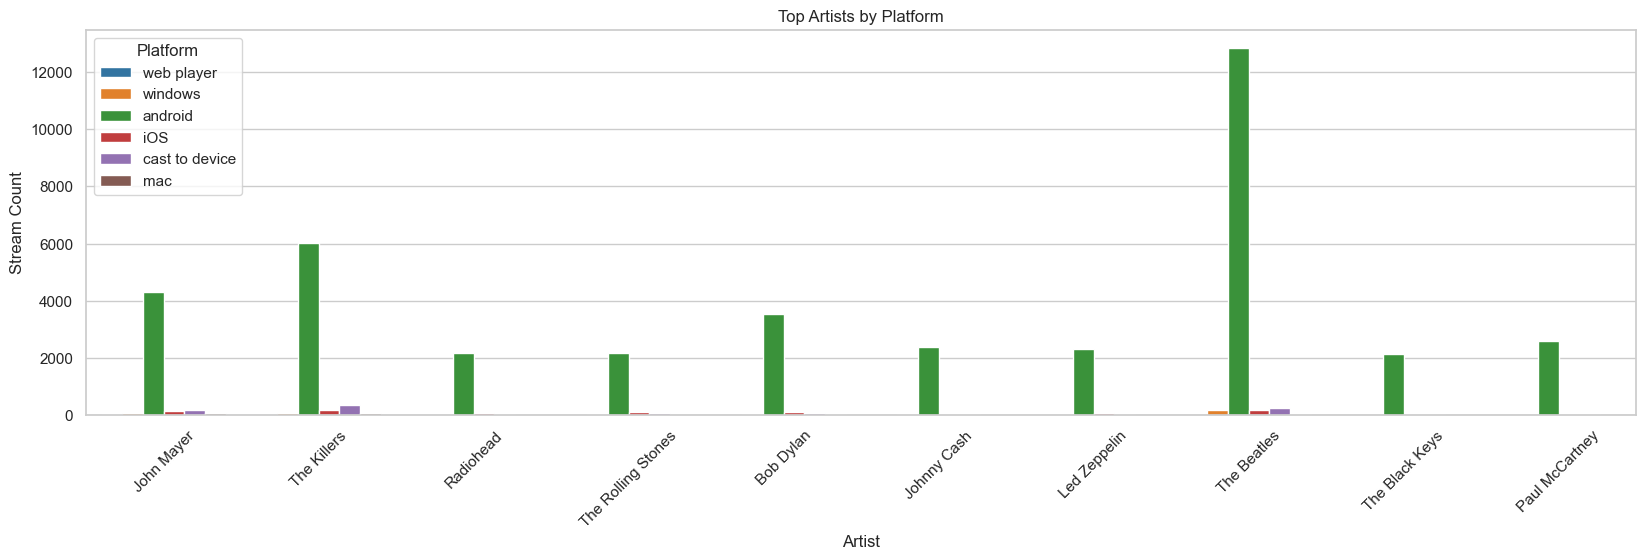

In [30]:
# Artist Popularity by Platform
top_artists_platform = data[data['artist_name'].isin(top_artists.index)]
plt.figure(figsize=(20,5))
sns.countplot(data=top_artists_platform, x='artist_name', hue='platform', palette='tab10')
plt.title('Top Artists by Platform')
plt.xlabel('Artist')
plt.ylabel('Stream Count')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.show()

<Figure size 2500x600 with 0 Axes>

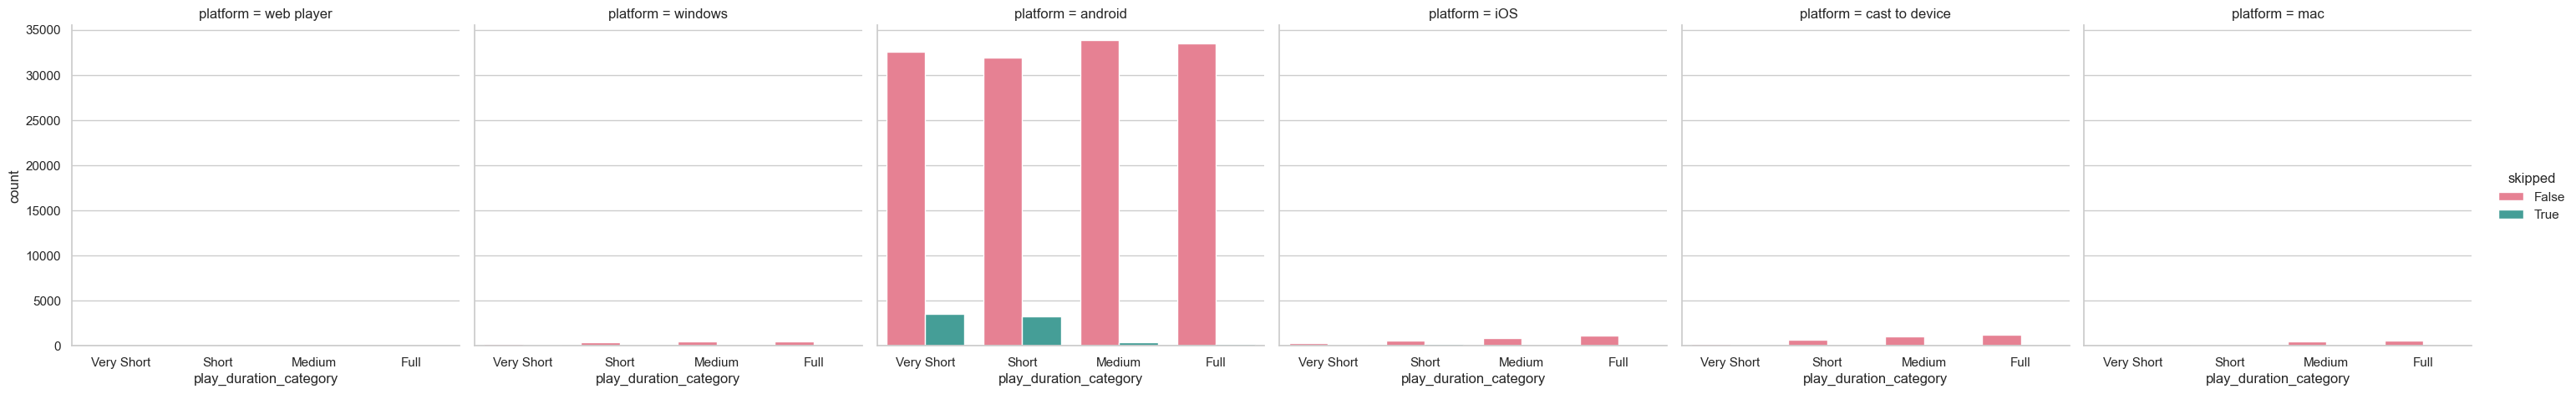

In [31]:
# Skipping Behavior Across Play Duration and Platform
plt.figure(figsize=(25,6))
sns.catplot(
    data=data, x='play_duration_category', hue='skipped', col='platform',
    kind='count', palette='husl', height=5, aspect=1
)
plt.subplots_adjust(top=0.9)
# plt.suptitle('Skipping Behavior Across Play Duration Categories and Platforms')
plt.show()

In [32]:
data.columns

Index(['spotify_track_uri', 'ts', 'platform', 'ms_played', 'track_name',
       'artist_name', 'album_name', 'reason_start', 'reason_end', 'shuffle',
       'skipped', 'year', 'month', 'day', 'day_of_week', 'hour', 'day_period',
       'play_duration_category'],
      dtype='object')

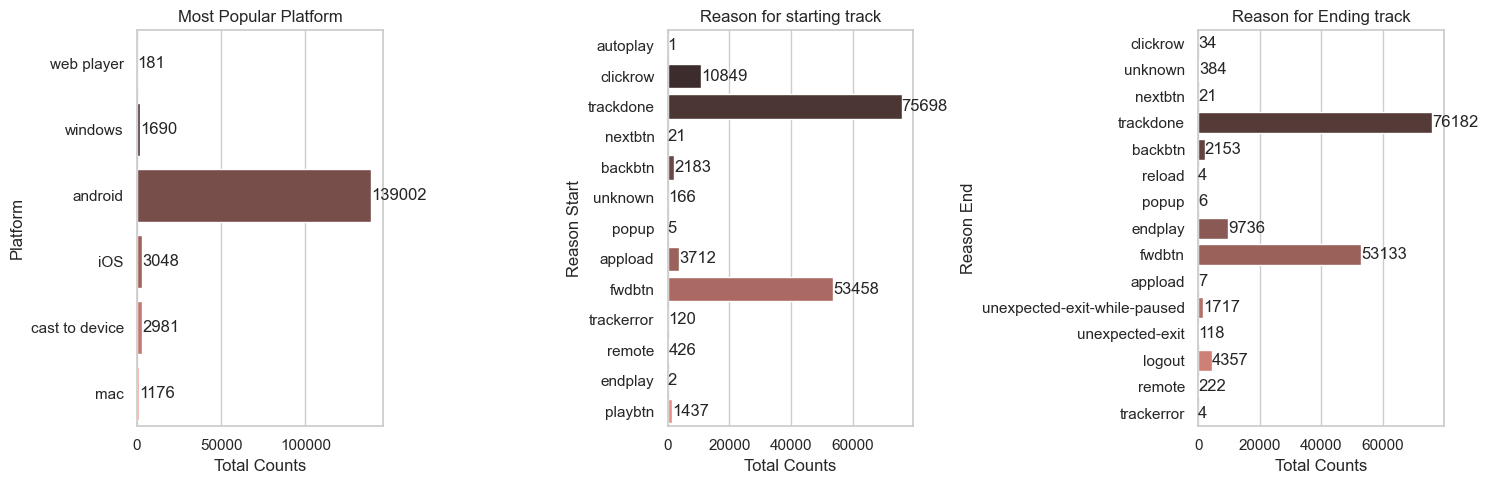

In [33]:
plt.figure(figsize=(15,5))

# Most popular platform

ax1 = plt.subplot2grid((1,3),(0,0))

sns.countplot(data=data, y='platform', palette='dark:salmon', ax=ax1)
for i in ax1.containers:
    plt.bar_label(i)
plt.xlabel("Total Counts")
plt.ylabel("Platform")
plt.title("Most Popular Platform")

# Reason Start

ax2 = plt.subplot2grid((1,3),(0,1))

sns.countplot(data=data, y='reason_start', palette='dark:salmon', ax=ax2)
for i in ax2.containers:
    plt.bar_label(i)
plt.xlabel("Total Counts")
plt.ylabel("Reason Start")
plt.title("Reason for starting track")

# Reason End

ax3 = plt.subplot2grid((1,3),(0,2))

sns.countplot(data=data, y='reason_end', palette='dark:salmon', ax=ax3)
for i in ax3.containers:
    plt.bar_label(i)
plt.xlabel("Total Counts")
plt.ylabel("Reason End")
plt.title("Reason for Ending track")

plt.tight_layout()
plt.show()

Platform Counts:

 - The majority of streams occurred on Android devices, accounting for 139,002 streams, significantly higher than any other platform.
 - iOS came in second with 3,048 streams, followed by cast to device (2,981), Windows (1,690), and Mac (1,176).
 - The least used platform was Web Player, with only 181 streams, indicating limited usage of the browser-based player.

Reason for Track Start (reason_start):

 - The most common reason for a track starting was trackdone (75,698), which indicates automatic continuation after the previous track finished.
fwdbtn (53,458) and clickrow (10,849) were also significant contributors, suggesting user-driven interactions like skipping forward or selecting tracks manually.
 - Other notable reasons include:
    - appload (3,712): Tracks starting when the app is loaded.
    - backbtn (2,183): Users going back to a previous track.
    - playbtn (1,437): Explicit play actions by users.
 - Rare reasons include nextbtn (21), popup (5), endplay (2), and autoplay (1), indicating infrequent usage of these functionalities.

Reason for Track End (reason_end):

 - Most tracks ended due to trackdone (76,182), indicating natural track completion.
 - fwdbtn (53,133) is the second most common reason, suggesting a high frequency of skipping tracks forward.
 - endplay (9,736) reflects tracks ending as a result of user or system actions like pausing or stopping playback.
 - Other notable reasons include:
    - logout (4,357): Tracks ending due to users logging out.
    - unexpected-exit-while-paused (1,717): Tracks stopped due to app or system interruptions.
 - Rare reasons include clickrow (34), nextbtn (21), appload (7), and popup (6), highlighting lesser-known or infrequent end-of-track events.

In [34]:
# Top 10 Artists by Total Counts & ms played

# Top 10 Artists by Total Counts
top_artists_counts = data.groupby(['artist_name']).agg({'spotify_track_uri':'size'}).sort_values(
    ascending=False, by='spotify_track_uri').head(10).reset_index()
top_artists_counts

,artist_name,spotify_track_uri
0,The Beatles,13479
1,The Killers,6714
2,John Mayer,4769
3,Bob Dylan,3776
4,Paul McCartney,2675
5,Led Zeppelin,2461
6,Johnny Cash,2456
7,The Rolling Stones,2360
8,Radiohead,2287
9,The Black Keys,2215


In [35]:
# Top 10 Artists by ms played
top_artists_ms_played = data.groupby(['artist_name']).agg({'ms_played':'sum'}).sort_values(
    ascending=False, by='ms_played').head(10).reset_index()
top_artists_ms_played

,artist_name,ms_played
0,The Beatles,1195821152
1,The Killers,1029586261
2,John Mayer,707529543
3,Bob Dylan,560367715
4,Paul McCartney,353736404
5,Howard Shore,348198589
6,The Strokes,309018931
7,The Rolling Stones,301682714
8,Pink Floyd,255820368
9,Led Zeppelin,245295507


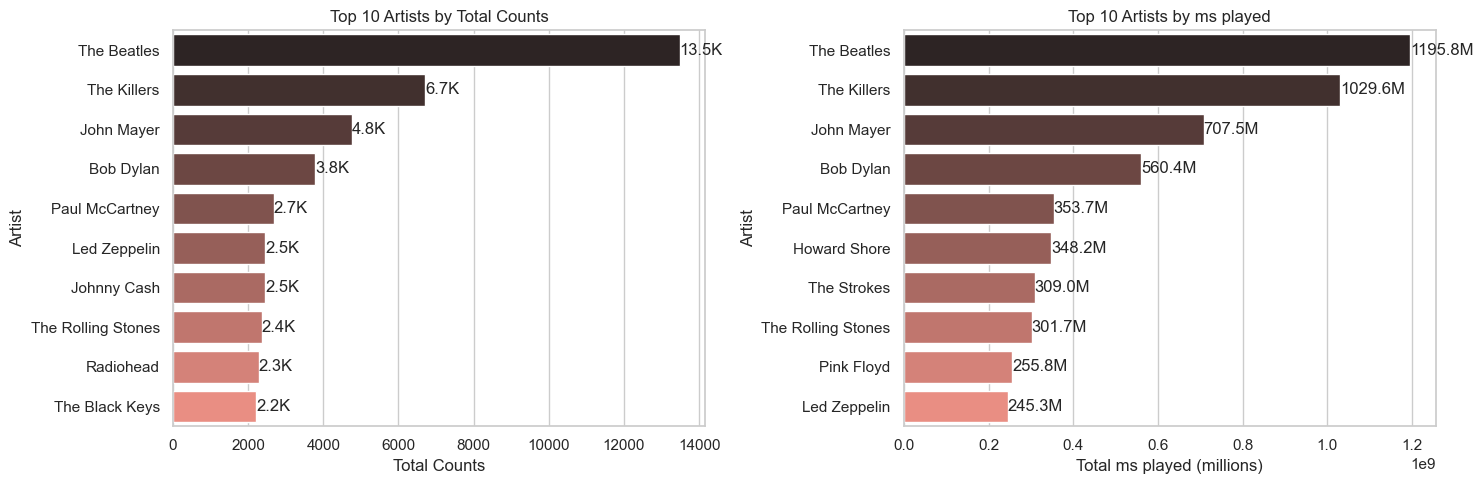

In [36]:
plt.figure(figsize=(15,5))

# Top 10 Artists by Total Counts

ax1 = plt.subplot2grid((1,2),(0,0))

sns.barplot(data=top_artists_counts, x='spotify_track_uri', y='artist_name', ci=None, dodge=False, palette='dark:salmon', ax=ax1)
for i in ax1.containers:
    for bar in i:
        # Calculate the value in Thousands
        value_in_thousands = bar.get_width() / 1e3
        # Format the value with one decimal place and add "K"
        ax1.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value_in_thousands:.1f}K', ha='left', va='center')
plt.xlabel("Total Counts")
plt.ylabel("Artist")
plt.title("Top 10 Artists by Total Counts")

# Top 10 Artists by ms played

ax2 = plt.subplot2grid((1,2),(0,1))

sns.barplot(data=top_artists_ms_played, x='ms_played', y='artist_name', ci=None, dodge=False, estimator=np.sum, palette='dark:salmon', ax=ax2)
for i in ax2.containers:
    for bar in i:
        # Calculate the value in millions
        value_in_million = bar.get_width() / 1e6
        # Format the value with one decimal place and add "M"
        ax2.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value_in_million:.1f}M', ha='left', va='center')
plt.xlabel("Total ms played (millions)")
plt.ylabel("Artist")
plt.title("Top 10 Artists by ms played")

plt.tight_layout()
plt.show()

In [37]:
# Top 10 Album by Total Counts & ms_played

# Top 10 Album by Total Counts
top_album_counts = data.groupby(['album_name']).agg({'spotify_track_uri':'size'}).sort_values(
    ascending=False, by='spotify_track_uri').head(10).reset_index()
top_album_counts

,album_name,spotify_track_uri
0,The Beatles,2038
1,Past Masters,1664
2,Abbey Road,1413
3,The Wall,1214
4,Revolver,1027
5,Help!,966
6,At Folsom Prison,910
7,Sgt. Pepper's Lonely Hearts Club Band,904
8,Exile On Main Street,880
9,Where the Light Is: John Mayer Live In Los Ang...,861


In [38]:
# Top 10 Album by ms_played
top_album_ms_played = data.groupby(['album_name']).agg({'ms_played':'sum'}).sort_values(
    ascending=False, by='ms_played').head(10).reset_index()
top_album_ms_played

,album_name,ms_played
0,The Beatles,184495983
1,The New Abnormal,179184663
2,Imploding The Mirage,159872808
3,Abbey Road,147791319
4,Blood On The Tracks,144513476
5,Past Masters,144405829
6,Hot Fuss,139207346
7,The Wall,137834210
8,Pressure Machine,113087484
9,Where the Light Is: John Mayer Live In Los Ang...,111405797


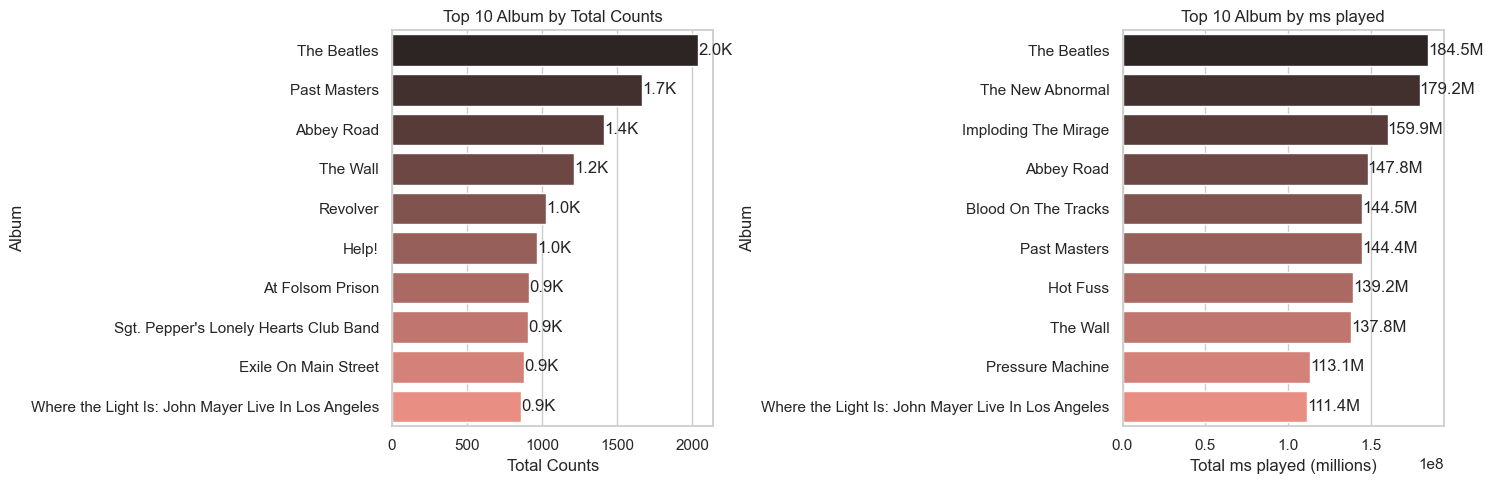

In [39]:
plt.figure(figsize=(15,5))

# Top 10 Albums by Total Counts

ax1 = plt.subplot2grid((1,2),(0,0))

sns.barplot(data=top_album_counts, x='spotify_track_uri', y='album_name', ci=None, dodge=False, palette='dark:salmon', ax=ax1)
for i in ax1.containers:
    for bar in i:
        # Calculate the value in Thousands
        value_in_thousands = bar.get_width() / 1e3
        # Format the value with one decimal place and add "K"
        ax1.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value_in_thousands:.1f}K', ha='left', va='center')
plt.xlabel("Total Counts")
plt.ylabel("Album")
plt.title("Top 10 Album by Total Counts")

# Top 10 Album by ms played

ax2 = plt.subplot2grid((1,2),(0,1))

sns.barplot(data=top_album_ms_played, x='ms_played', y='album_name', ci=None, dodge=False, estimator=np.sum, palette='dark:salmon', ax=ax2)
for i in ax2.containers:
    for bar in i:
        # Calculate the value in millions
        value_in_million = bar.get_width() / 1e6
        # Format the value with one decimal place and add "M"
        ax2.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value_in_million:.1f}M', ha='left', va='center')
plt.xlabel("Total ms played (millions)")
plt.ylabel("Album")
plt.title("Top 10 Album by ms played")

plt.tight_layout()
plt.show()

In [40]:
# Top 10 track name by total counts & ms played

# Top 10 track name by total counts
top_track_name_counts = data.groupby(['track_name']).agg({'spotify_track_uri':'size'}).sort_values(
    ascending=False, by='spotify_track_uri').head(10).reset_index()
top_track_name_counts

,track_name,spotify_track_uri
0,Ode To The Mets,203
1,In the Blood,180
2,Dying Breed,165
3,Caution,153
4,19 Dias y 500 Noches - En Directo,146
5,Concerning Hobbits,141
6,The Boxer,134
7,All These Things That I've Done,134
8,Come Together - Remastered 2009,133
9,Yesterday - Remastered 2009,132


In [41]:
# Top 10 Album by ms_played
top_track_name_ms_played = data.groupby(['track_name']).agg({'ms_played':'sum'}).sort_values(
    ascending=False, by='ms_played').head(10).reset_index()
top_track_name_ms_played

,track_name,ms_played
0,Ode To The Mets,66024432
1,The Return of the King (feat. Sir James Galway...,64401661
2,The Fellowship Reunited (feat. Sir James Galwa...,44756730
3,19 Dias y 500 Noches - En Directo,42375027
4,In the Blood,38183421
5,Claudia's Theme - Version Eight,37120900
6,Dying Breed,35936660
7,"The Breaking of the Fellowship (feat. ""In Drea...",35550098
8,"The Road Goes Ever On..., Pt. 1",35236377
9,All These Things That I've Done,33643898


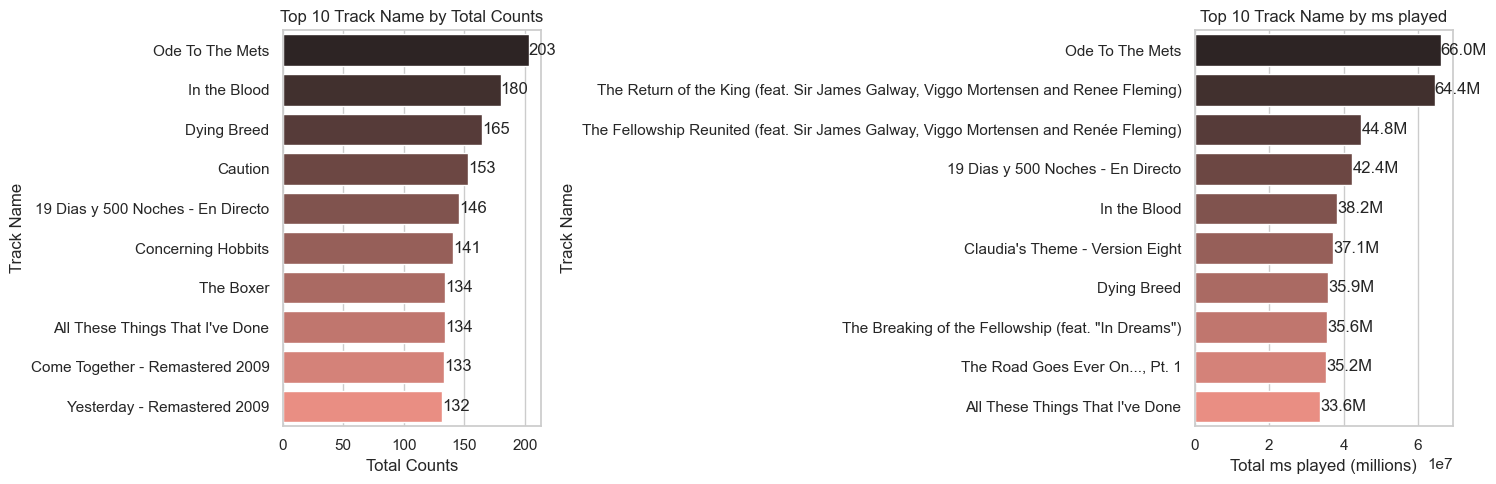

In [42]:
plt.figure(figsize=(15,5))

# Top 10 Track Name by Total Counts

ax1 = plt.subplot2grid((1,2),(0,0))

sns.barplot(data=top_track_name_counts, x='spotify_track_uri', y='track_name', ci=None, dodge=False, palette='dark:salmon', ax=ax1)
for i in ax1.containers:
    plt.bar_label(i)
plt.xlabel("Total Counts")
plt.ylabel("Track Name")
plt.title("Top 10 Track Name by Total Counts")

# Top 10 Track Name by ms played

ax2 = plt.subplot2grid((1,2),(0,1))

sns.barplot(data=top_track_name_ms_played, x='ms_played', y='track_name', ci=None, dodge=False, estimator=np.sum, palette='dark:salmon', ax=ax2)
for i in ax2.containers:
    for bar in i:
        # Calculate the value in millions
        value_in_million = bar.get_width() / 1e6
        # Format the value with one decimal place and add "M"
        ax2.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value_in_million:.1f}M', ha='left', va='center')
plt.xlabel("Total ms played (millions)")
plt.ylabel("Track Name")
plt.title("Top 10 Track Name by ms played")

plt.tight_layout()
plt.show()

In [43]:
# Top Artists Year-wise (counts)
top_artists_year_wise = data.groupby(['year', 'artist_name']).agg({'spotify_track_uri':'size'}).sort_values(
    ascending=False, by=['year', 'spotify_track_uri']).groupby('year').head(1).reset_index()
top_artists_year_wise

,year,artist_name,spotify_track_uri
0,2024,The Beatles,511
1,2023,The Beatles,730
2,2022,The Beatles,993
3,2021,The Beatles,1446
4,2020,The Killers,1928
5,2019,The Beatles,1993
6,2018,The Beatles,2001
7,2017,The Beatles,3229
8,2016,The Beatles,713
9,2015,The Script,123


In [44]:
# Top Artists Year-wise (ms_played)
top_artists_year_wise_ms_played = data.groupby(['year', 'artist_name']).agg({'ms_played':'sum'}).sort_values(
    ascending=False, by=['year', 'ms_played']).groupby('year').head(1).reset_index()
top_artists_year_wise_ms_played

,year,artist_name,ms_played
0,2024,John Mayer,91163263
1,2023,The Killers,98003709
2,2022,Joaquín Sabina,144082734
3,2021,The Killers,139063222
4,2020,The Killers,332004928
5,2019,The Beatles,188679000
6,2018,The Beatles,182794763
7,2017,The Beatles,242551210
8,2016,The Beatles,56764972
9,2015,The Rolling Stones,9977664
